In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from kdelearn.kde import KDE

In [2]:
def foo(kernel_name, m, seed):
    np.random.seed(seed)

    fig, axs = plt.subplots(2, 2, figsize=(10, 8))

    for e, d in enumerate([0.1, 0.2, 0.35, 0.5]):
        x_train1 = np.random.normal(0, 1, size=(int(d * m), 1))
        x_train2 = np.random.normal(4, 1, size=(m - int(d * m), 1))
        x_train = np.concatenate((x_train1, x_train2))

        x_test = np.linspace(-4, 8, 100)[:, None]

        kde = KDE(kernel_name).fit(x_train)
        scores = kde.pdf(x_test)
        true_dist = d * norm.pdf(x_test, 0, 1) + (1 - d) * norm.pdf(x_test, 4, 1)

        axs[e//2, e%2].set_title(f"{d}:{1-d}")
        axs[e//2, e%2].plot(x_test, true_dist, label="true dist.")
        axs[e//2, e%2].plot(x_test, scores, label="kde")
        axs[e//2, e%2].legend()
        axs[e//2, e%2].set_xlim(-4, 8)
        axs[e//2, e%2].set_ylim(0, 0.4)
        axs[e//2, e%2].grid()

    plt.show()

# uniform kernel

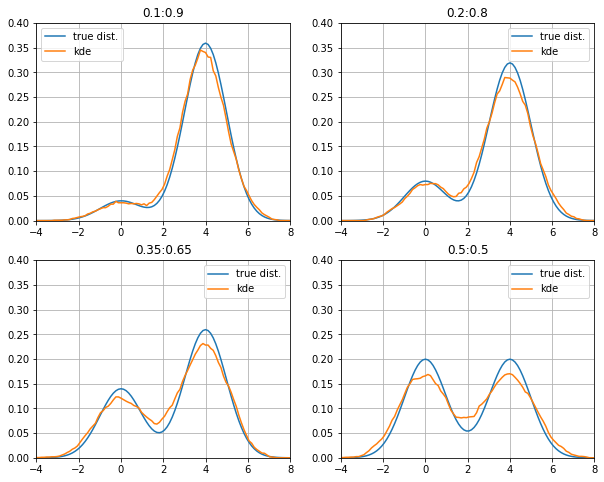

In [3]:
foo(kernel_name="uniform", m=1000, seed=0)

# gaussian kernel

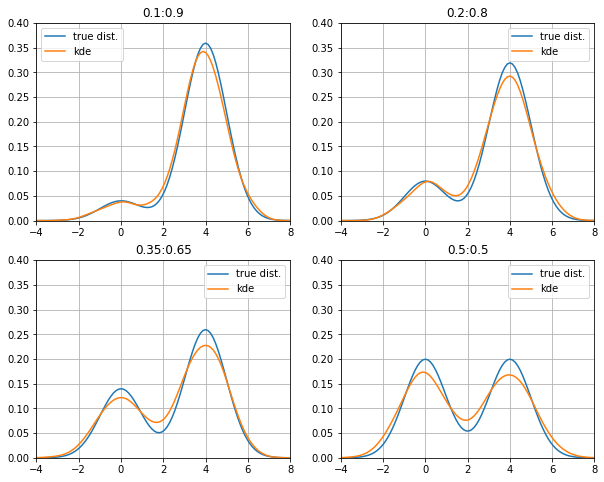

In [4]:
foo(kernel_name="gaussian", m=1000, seed=0)

# epanechnikov kernel

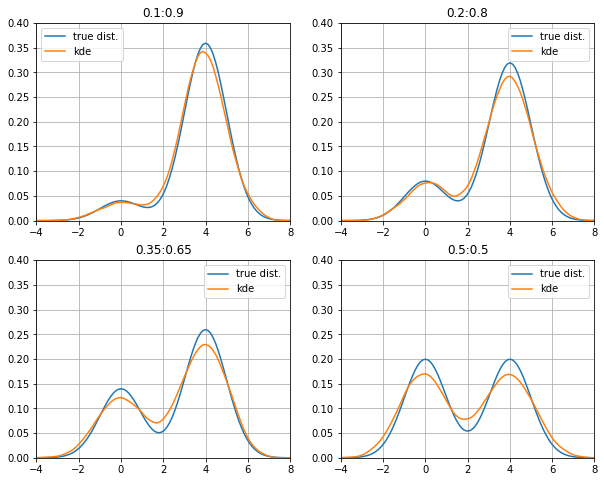

In [5]:
foo(kernel_name="epanechnikov", m=1000, seed=0)

# cauchy kernel

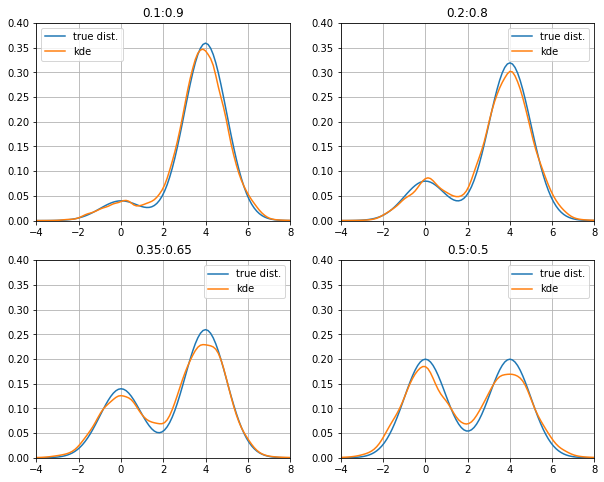

In [6]:
foo(kernel_name="cauchy", m=1000, seed=0)